**DATA PRE-PROCESSING**

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [23]:
dataset = pd.read_csv('/content/Food demand.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [24]:
dataset.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1000000,3,157,2760,233.83,231.83,0,0,149
1,1000001,100,104,2956,486.03,583.03,0,0,161
2,1000002,143,75,1971,328.86,327.86,0,0,149
3,1000003,41,24,2539,145.53,145.53,0,0,540
4,1000004,45,83,2539,95.06,120.34,0,0,271


In [25]:
dataset.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders'],
      dtype='object')

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1999 non-null   int64  
 1   week                   1999 non-null   int64  
 2   center_id              1999 non-null   int64  
 3   meal_id                1999 non-null   int64  
 4   checkout_price         1999 non-null   float64
 5   base_price             1999 non-null   float64
 6   emailer_for_promotion  1999 non-null   int64  
 7   homepage_featured      1999 non-null   int64  
 8   num_orders             1999 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.7 KB


**SOME VISUALIZATIONS** 

In [27]:
df=dataset.drop('week', axis=1)
df

,id,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1000000,157,2760,233.83,231.83,0,0,149
1,1000001,104,2956,486.03,583.03,0,0,161
2,1000002,75,1971,328.86,327.86,0,0,149
3,1000003,24,2539,145.53,145.53,0,0,540
4,1000004,83,2539,95.06,120.34,0,0,271
...,...,...,...,...,...,...,...,...
1994,1002177,72,1311,130.04,177.51,0,0,68
1995,1002178,50,2444,604.31,606.31,0,0,109
1996,1002179,88,1971,291.06,291.06,0,0,366
1997,1002180,58,1543,473.39,473.39,0,1,42


In [28]:
df=df.drop('id', axis=1)
df

,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,157,2760,233.83,231.83,0,0,149
1,104,2956,486.03,583.03,0,0,161
2,75,1971,328.86,327.86,0,0,149
3,24,2539,145.53,145.53,0,0,540
4,83,2539,95.06,120.34,0,0,271
...,...,...,...,...,...,...,...
1994,72,1311,130.04,177.51,0,0,68
1995,50,2444,604.31,606.31,0,0,109
1996,88,1971,291.06,291.06,0,0,366
1997,58,1543,473.39,473.39,0,1,42


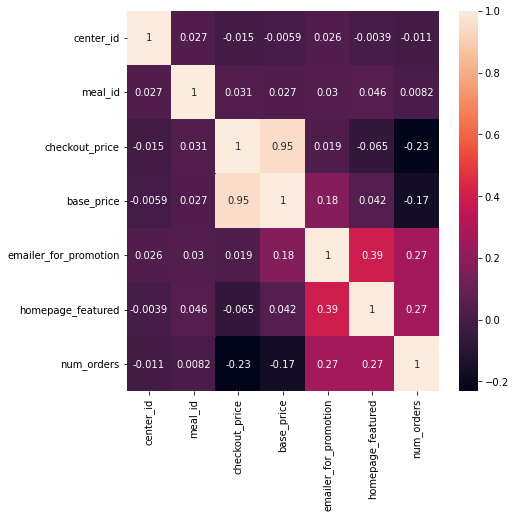

In [29]:
df.corr()
fig = plt.figure(figsize = (7,7))
sns.heatmap(df.corr(), annot = True)

Text(0, 0.5, 'no_of_orders')

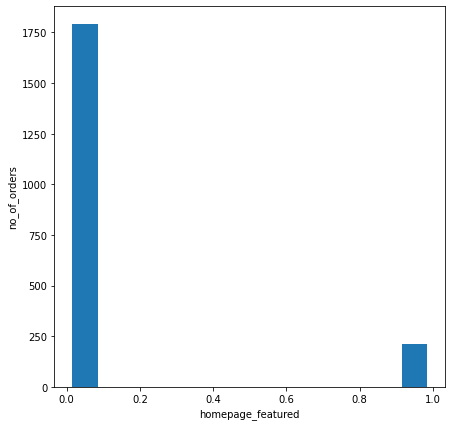

In [30]:
fig = plt.figure(figsize = (7,7))
plt.hist(df['homepage_featured'], rwidth=0.7)
plt.xlabel('homepage_featured')
plt.ylabel('no_of_orders')

Text(0, 0.5, 'no_of_orders')

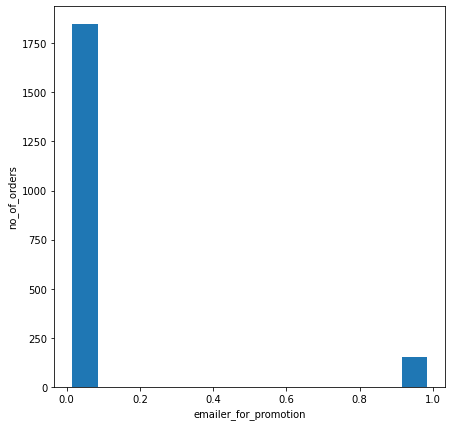

In [31]:
fig = plt.figure(figsize = (7,7))
plt.hist(df['emailer_for_promotion'], rwidth=0.7)
plt.xlabel('emailer_for_promotion')
plt.ylabel('no_of_orders')

Text(0, 0.5, 'no_of_orders')

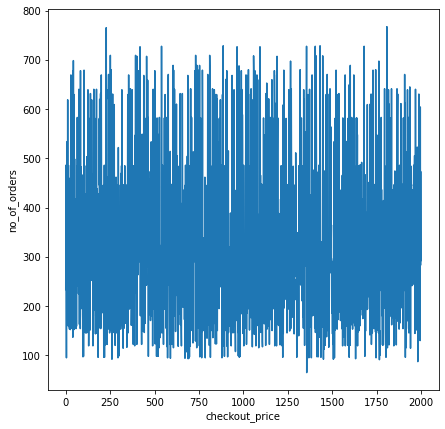

In [32]:
fig = plt.figure(figsize = (7,7))
plt.plot(dataset['checkout_price'])
plt.xlabel('checkout_price')
plt.ylabel('no_of_orders')

**SPLITTING THE DATA INTO TRAINING AND TEST DATASETS**

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)


In [40]:
len(X_train)

1599

In [41]:
len(X_test)

400

**XGBoost**

In [34]:
from xgboost import XGBRegressor

In [35]:
xgreg=XGBRegressor()

In [36]:
xgreg.fit(X_train,y_train)

[11:20:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [37]:
y_pred=xgreg.predict(X_test)

In [ ]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


In [39]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.41067388056347465

**RANDOM FOREST REGRESSION**

In [42]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


In [44]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.3429296937458063